In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
for csv in os.listdir('Sales_Data/'): print(csv)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
data1 = pd.read_csv('Sales_Data/Sales_December_2019.csv')
data1.shape

(25117, 6)

In [6]:
data1.loc[18383] = 1

In [7]:
data1.loc[18384] = [00000,"aaa",3,4.99,'05/11/19',"aaa"]

In [8]:
data1.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [9]:
data1.shape

(25117, 6)

In [10]:
dfs = [df for df in os.listdir('Sales_Data/')]

In [11]:
s = 0
for i in range(0,len(dfs)):
    s = s + pd.read_csv('Sales_Data/'+dfs[i]).shape[0]
    print(pd.read_csv('Sales_Data/'+dfs[i]).shape)

print(s)

(18383, 6)
(12011, 6)
(25117, 6)
(12036, 6)
(9723, 6)
(14371, 6)
(13622, 6)
(15226, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(11686, 6)
186850


In [12]:
alldata = pd.DataFrame()
for csv in dfs:
    df1 = pd.read_csv('Sales_Data/'+csv)
    alldata = pd.concat([alldata,df1])
alldata.shape

(186850, 6)

In [13]:
alldata 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
#alldata.to_csv('Sales_2019.csv',index=False)

### what was the best month for sales ? how much was earned ?

In [14]:
alldata.describe()### what was the best month for sales ? how much was earned ?

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [15]:
alldata['Month'] = alldata['Order Date'].str[:2]

In [16]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [17]:
alldata[alldata.isnull()]
alldata = alldata.dropna(how='any')
alldata.shape

(186305, 7)

In [18]:
alldata = alldata.loc[alldata['Month']!='Or']
alldata.shape

(185950, 7)

In [19]:
alldata.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
count,185950,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787,12
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016",12
freq,5,21903,168552,21903,8,9,24984


In [20]:
alldata.loc[alldata['Month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [21]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
alldata.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [23]:
alldata['Month'] = pd.to_numeric(alldata['Month'])

In [24]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [25]:
alldata.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [26]:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])
alldata['Price Each'] = pd.to_numeric(alldata['Price Each'] )

In [27]:
alldata['Total'] = alldata['Quantity Ordered'] * alldata['Price Each']
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [28]:
alldata.groupby('Month').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total
Month,,,,,,,
1,9709,9709,9709,9709,9709,9709,9709
2,11975,11975,11975,11975,11975,11975,11975
3,15153,15153,15153,15153,15153,15153,15153
4,18279,18279,18279,18279,18279,18279,18279
5,16566,16566,16566,16566,16566,16566,16566
6,13554,13554,13554,13554,13554,13554,13554
7,14293,14293,14293,14293,14293,14293,14293
8,11961,11961,11961,11961,11961,11961,11961
9,11621,11621,11621,11621,11621,11621,11621


In [29]:
alldata.groupby('Month').sum()

,Quantity Ordered,Price Each,Total
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [30]:
alldata.groupby('Month').max()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total
Month,,,,,,,
1,319366,iPhone,7,1700.0,01/31/19 23:35,"999 Walnut St, San Francisco, CA 94016",1999.98
2,162008,iPhone,7,1700.0,02/28/19 23:59,"999 Wilson St, New York City, NY 10001",1700.00
3,176557,iPhone,7,1700.0,03/31/19 23:46,"999 Sunset St, Los Angeles, CA 90001",1700.00
4,194094,iPhone,7,1700.0,04/30/19 23:49,"999 Pine St, Boston, MA 02215",3400.00
5,209920,iPhone,7,1700.0,05/31/19 23:49,"999 Wilson St, Portland, OR 97035",3400.00
6,222909,iPhone,9,1700.0,06/30/19 23:56,"999 Wilson St, San Francisco, CA 94016",3400.00
7,236669,iPhone,9,1700.0,07/31/19 23:43,"999 Willow St, Seattle, WA 98101",1700.00
8,248150,iPhone,8,1700.0,08/31/19 23:57,"999 Sunset St, San Francisco, CA 94016",1700.00
9,259357,iPhone,6,1700.0,09/30/19 23:59,"999 Wilson St, Los Angeles, CA 90001",1700.00


In [31]:
alldata.groupby('Month').mean()

,Quantity Ordered,Price Each,Total
Month,,,
1,1.122979,186.607105,187.687376
2,1.123090,182.787868,183.884962
3,1.122220,184.201665,185.250471
4,1.124679,184.237158,185.495390
5,1.126826,189.250581,190.305852
6,1.125350,189.023580,190.187565
7,1.124467,184.183835,185.249826
8,1.124321,186.468140,187.648849
9,1.128044,179.415893,180.497387


##### what was the best month for sales ? 

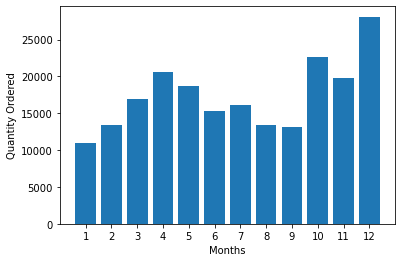

In [32]:
x = range(1,13)
#y = alldata.groupby('Month').count()['Quantity Ordered']
y = alldata.groupby('Month').sum()['Quantity Ordered']
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('Quantity Ordered')
plt.bar(x,y)
plt.show()
# Month 12 , Quantity = 28114  

##### how much was earned ?

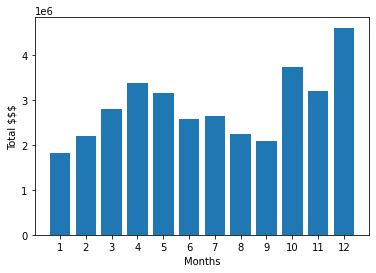

In [33]:
x = range(1,13)
y = alldata.groupby('Month').sum()['Total']
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('Total $$$')
plt.bar(x,y)
plt.show()

##### the city had the heighest sales amount each month

### what city had the heighest number of sales ? 

In [34]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [35]:
alldata['City'] = alldata['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2]).str[:-5]

In [36]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [37]:
alldata.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Total               float64
City                 object
dtype: object

In [38]:
alldata.groupby('City').count() #the number of rows for each city

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
City,,,,,,,,
Atlanta GA,14881,14881,14881,14881,14881,14881,14881,14881
Austin TX,9905,9905,9905,9905,9905,9905,9905,9905
Boston MA,19934,19934,19934,19934,19934,19934,19934,19934
Dallas TX,14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles CA,29605,29605,29605,29605,29605,29605,29605,29605
New York City NY,24876,24876,24876,24876,24876,24876,24876,24876
Portland ME,2455,2455,2455,2455,2455,2455,2455,2455
Portland OR,10010,10010,10010,10010,10010,10010,10010,10010
San Francisco CA,44732,44732,44732,44732,44732,44732,44732,44732


In [39]:
alldata.groupby('City').sum() #the of Quantity Ordered in each city

,Quantity Ordered,Price Each,Month,Total
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [40]:
alldata['City'].unique()

array([' Dallas  TX ', ' Boston  MA ', ' Los Angeles  CA ',
       ' San Francisco  CA ', ' Seattle  WA ', ' Atlanta  GA ',
       ' New York City  NY ', ' Portland  OR ', ' Austin  TX ',
       ' Portland  ME '], dtype=object)

##### the city had the heighest number of order

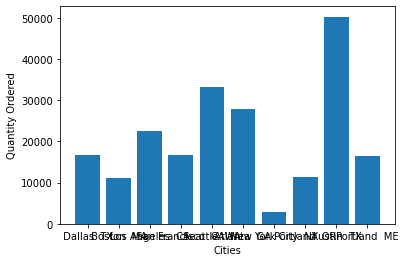

In [41]:
x = alldata['City'].unique()
y = alldata.groupby('City').sum()['Quantity Ordered'] 
#plt.xticks(x,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Quantity Ordered')
plt.bar(x,y)
plt.show()

##### the city had the heighest sales amount

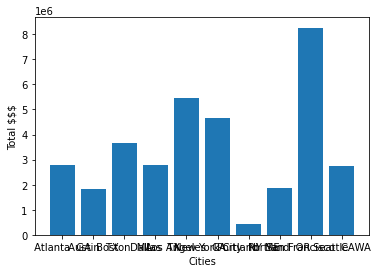

In [42]:
x = [city for city,df in alldata.groupby('City')]
y = alldata.groupby('City').sum()['Total'] 
#plt.xticks(x)
plt.xlabel('Cities')
plt.ylabel('Total $$$')
plt.bar(x,y)
plt.show()

### whats the best time for customer buy product

In [43]:
alldata.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Total               float64
City                 object
dtype: object

In [44]:
alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])

In [45]:
alldata.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Total                      float64
City                        object
dtype: object

In [46]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [47]:
alldata['Hour'] = alldata['Order Date'].dt.hour
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [48]:
alldata.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Total                      float64
City                        object
Hour                         int64
dtype: object

In [49]:
alldata.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


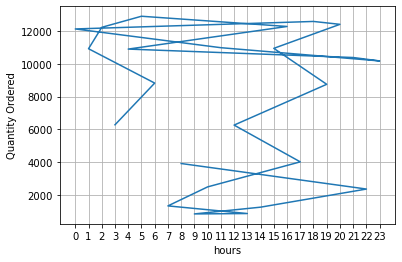

In [50]:
x = alldata['Hour'].unique()
y = alldata.groupby('Hour').count()['Quantity Ordered']
plt.xticks(x)
plt.xlabel('hours')
plt.ylabel('Quantity Ordered')
plt.plot(x,y)
plt.grid()
plt.show()

In [51]:
'''x = [h for h, df in alldata.groupby('Hour')]
plt.plot(x,alldata.groupby('Hour').count())'''

"x = [h for h, df in alldata.groupby('Hour')]\nplt.plot(x,alldata.groupby('Hour').count())"

### what is the most collection are sold 

In [52]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [53]:
alldata[alldata['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13


In [66]:
#alldata.to_csv('Sales_Data/Sales_2019.csv')

In [2]:
import pandas as pd

In [7]:
sales = pd.read_csv('Sales_Data/Sales_2019.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_3904\2117940701.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('Sales_Data/Sales_2019.csv')


In [17]:
sales.to_excel('Sales_Data/Sales_2019_xlsx.xlsx')

In [10]:
collecton = pd.read_csv('Sales_Data/collection_2019.csv')

In [16]:
collecton.to_excel('Sales_Data/collection_2019_xlsx.xlsx')

In [54]:
dfcollec = alldata[alldata['Order ID'].duplicated(keep=False)]
dfcollec.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11


In [55]:
dfcollec.groupby('Order ID').count()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
Order ID,,,,,,,,,
141275,2,2,2,2,2,2,2,2,2
141290,2,2,2,2,2,2,2,2,2
141365,2,2,2,2,2,2,2,2,2
141384,2,2,2,2,2,2,2,2,2
141450,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
319536,2,2,2,2,2,2,2,2,2
319556,2,2,2,2,2,2,2,2,2
319584,2,2,2,2,2,2,2,2,2


In [56]:
dfcollec.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11


In [57]:
dfcollec['Collection'] = dfcollec.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))
dfcollec.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\662909961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Collection'] = dfcollec.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Collection
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone , Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone , Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone , USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone , USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H..."


In [58]:
dfcollec['Total Collection'] = dfcollec.groupby('Order ID')['Total'].transform(lambda x: sum(x))
dfcollec.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\432166362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Total Collection'] = dfcollec.groupby('Order ID')['Total'].transform(lambda x: sum(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Collection,Total Collection
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H...",199.98


In [59]:
dfcollec.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Total                      float64
City                        object
Hour                         int64
Collection                  object
Total Collection           float64
dtype: object

In [60]:
dfcollec['Each Price'] = dfcollec['Price Each'].astype('string')
dfcollec.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\947619057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Each Price'] = dfcollec['Price Each'].astype('string')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Collection,Total Collection,Each Price
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H...",199.98,99.99


In [61]:
dfcollec['Each Price'] = dfcollec.groupby('Order ID')['Each Price'].transform(lambda x:' ; '.join(x))
dfcollec.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\1563206447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Each Price'] = dfcollec.groupby('Order ID')['Each Price'].transform(lambda x:' ; '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Collection,Total Collection,Each Price
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0 ; 11.99
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0 ; 11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0 ; 11.95
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0 ; 11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H...",199.98,99.99 ; 99.99


In [62]:
dfcollec['Quantity Collection'] = dfcollec.groupby('Order ID')['Quantity Ordered'].transform(lambda x:sum(x))

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\490466606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Quantity Collection'] = dfcollec.groupby('Order ID')['Quantity Ordered'].transform(lambda x:sum(x))


In [63]:
dfcollec['Quantity Ordered'] = dfcollec['Quantity Ordered'].astype('string')
dfcollec['Each Quantity'] = dfcollec.groupby('Order ID')['Quantity Ordered'].transform(lambda x: ' ; '.join(x))
dfcollec.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_8892\2174652822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Quantity Ordered'] = dfcollec['Quantity Ordered'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_8892\2174652822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcollec['Each Quantity'] = dfcollec.groupby('Order ID')['Quantity Ordered'].transform(lambda x: ' ; '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Collection,Total Collection,Each Price,Quantity Collection,Each Quantity
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0 ; 11.99,2,1 ; 1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0 ; 11.99,2,1 ; 1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0 ; 11.95,2,1 ; 1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0 ; 11.95,2,1 ; 1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H...",199.98,99.99 ; 99.99,2,1 ; 1


In [68]:
dfcollec.shape

(14649, 15)

In [69]:
dfcollec1 = dfcollec[dfcollec['Order ID'].duplicated()]
dfcollec1 = dfcollec1.drop(columns=['Product','Quantity Ordered','Price Each','Total'])

In [70]:
dfcollec1.shape

(7513, 11)

In [71]:
dfcollec1

,Order ID,Order Date,Purchase Address,Month,City,Hour,Collection,Total Collection,Each Price,Quantity Collection,Each Quantity
4,176560,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,14,"Google Phone , Wired Headphones",611.99,600.0 ; 11.99,2,1 ; 1
19,176574,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles CA,19,"Google Phone , USB-C Charging Cable",611.95,600.0 ; 11.95,2,1 ; 1
31,176585,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston MA,11,"Bose SoundSport Headphones , Bose SoundSport H...",199.98,99.99 ; 99.99,2,1 ; 1
33,176586,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco CA,17,"AAA Batteries (4-pack) , Google Phone",605.98,2.99 ; 600.0,3,2 ; 1
120,176672,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City NY,11,"Lightning Charging Cable , USB-C Charging Cable",26.90,14.95 ; 11.95,2,1 ; 1
...,...,...,...,...,...,...,...,...,...,...,...
11620,259297,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,Boston MA,18,"iPhone , Lightning Charging Cable , Lightning ...",729.90,700.0 ; 14.95 ; 14.95,3,1 ; 1 ; 1
11621,259297,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,Boston MA,18,"iPhone , Lightning Charging Cable , Lightning ...",729.90,700.0 ; 14.95 ; 14.95,3,1 ; 1 ; 1
11628,259303,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta GA,20,"34in Ultrawide Monitor , AA Batteries (4-pack)",383.83,379.99 ; 3.84,2,1 ; 1
11640,259314,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta GA,0,"Wired Headphones , AAA Batteries (4-pack)",17.97,11.99 ; 2.99,3,1 ; 2


In [79]:
dfcollec1.to_csv('Sales_Data/collection_2019.csv')

In [81]:
alldata.shape , dfcollec1.shape

((185950, 10), (7513, 11))

### whats the collection has hieghest total

In [72]:
dfcollec1.groupby('Collection').sum()

,Month,Hour,Total Collection,Quantity Collection
Collection,,,,
"20in Monitor , 20in Monitor",17,35,659.94,6
"20in Monitor , 27in FHD Monitor",21,24,519.96,4
"20in Monitor , 34in Ultrawide Monitor",7,22,489.98,2
"20in Monitor , AA Batteries (4-pack)",39,107,796.81,14
"20in Monitor , AAA Batteries (4-pack)",27,38,341.93,7
...,...,...,...,...
"iPhone , USB-C Charging Cable",66,163,8555.35,25
"iPhone , Vareebadd Phone",13,40,3300.00,6
"iPhone , Wired Headphones",2465,5131,257388.09,752


In [73]:
m = dfcollec1.groupby('Collection')['Quantity Collection'].sum()
#m.loc[m == m.max()]
m.sort_values(ascending=False)

Collection
iPhone , Lightning Charging Cable              1822
Google Phone , USB-C Charging Cable            1785
iPhone , Wired Headphones                       752
Vareebadd Phone , USB-C Charging Cable          648
Google Phone , Wired Headphones                 637
                                               ... 
LG Washing Machine , 20in Monitor                 2
USB-C Charging Cable , LG Dryer                   2
AAA Batteries (4-pack) , LG Dryer                 2
LG Washing Machine , 27in 4K Gaming Monitor       2
iPhone , iPhone                                   2
Name: Quantity Collection, Length: 366, dtype: int64

### what the product sold most?

In [74]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [75]:
alldata.groupby('Product').sum()

,Quantity Ordered,Price Each,Month,Total,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


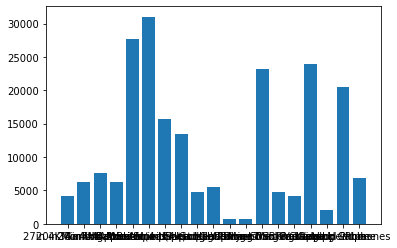

In [76]:
x = [prd for prd,df in alldata.groupby('Product')]
y = alldata.groupby('Product')['Quantity Ordered'].sum()
plt.bar(x,y)
plt.show()

In [77]:
alldata.groupby('Product').mean()

,Quantity Ordered,Price Each,Month,Total,Hour
Product,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458


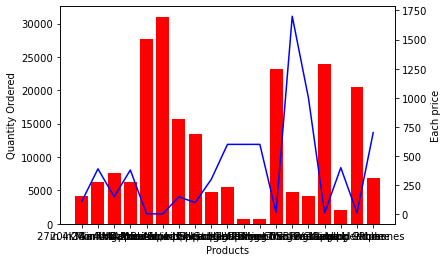

In [78]:
x = [prd for prd,df in alldata.groupby('Product')]
y = alldata.groupby('Product')['Quantity Ordered'].sum()
y2 = alldata.groupby('Product')['Price Each'].mean()

fig , ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(x,y,color='r')
ax2.plot(x,y2,'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Each price')

plt.show()